# Gray Scott simulation by Finite Difference
*(Run the second cell first)*

There is the choice of four methods:
*   'FTCS' - Eulers method with centrally spacing.
*   'Heun' - Improved Euler.
*   'Splitter' - Ordinary splitting method.
*   'Strang' - Strand splitting method.

Paramkeys can be taken from the dictionary below!


Main loop in 19.0055 seconds


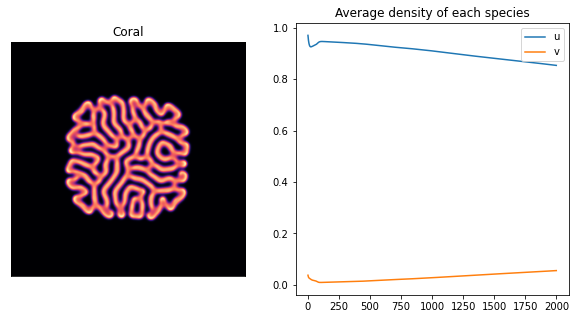

In [6]:
sim_time = 2000

paramkey = 'Coral'

Du, Dv, F, k, Dx = paramDict[paramkey]

Dt = (Dx*Dx)/( 4*max(Du,Dv) )

U, V, U_series, V_series = Gray_Scott(sim_time, method = 'Strang', n = 2**8, periodic = False)

plotter(U, V, U_series, V_series, paramkey, 'Strang')

In [5]:
                           #   Du,   Dv,     F,     k,    Dx
paramDict = {'Bacteria 1'  :[0.14, 0.06, 0.035, 0.065,   0.7],
             'Bacteria 2'  :[0.14, 0.06, 0.035, 0.065,   0.7],
             'Coral'       :[0.16, 0.08, 0.060, 0.062,     1],
             'Fingerprint' :[0.19, 0.05, 0.060, 0.062,   0.8],
             'Spirals'     :[0.12, 0.08, 0.018, 0.050,   0.5],
             'Spirals Fast':[0.03, 0.16, 0.018, 0.050,   0.5],
             'Unstable'    :[0.16, 0.08, 0.020, 0.055,   0.7],
             'Worms 1'     :[0.16, 0.08, 0.078, 0.061, 1/572],
             'Worms 2'     :[0.16, 0.08, 0.054, 0.063, 1/572],
             'Zebrafish'   :[0.16, 0.08, 0.035, 0.060,   0.7],
             'Alpha'	   :[2e-5, 1e-5, 0.010, 0.047, 1/572],
             'Beta'	  	   :[2e-5, 1e-5, 0.014, 0.039, 1/286],
             'Gamma'	   :[2e-5, 1e-5, 0.022, 0.051, 1/286],
             'Delta'	   :[2e-5, 1e-5, 0.030, 0.055, 1/286],
             'Epsilon'	   :[2e-5, 1e-5, 0.018, 0.055, 1/286],
             'Zeta'  	   :[2e-5, 1e-5, 0.022, 0.061, 1/286],
             'Eta'	  	   :[2e-5, 1e-5, 0.034, 0.063, 1/286],
             'Theta'	   :[2e-5, 1e-5, 0.038, 0.061, 1/286],
             'Iota'	       :[2e-5, 1e-5, 0.046, 0.0594,1/286],
             'Kappa'	   :[2e-5, 1e-5, 0.058, 0.063, 1/286],
             'Lambda'	   :[2e-5, 1e-5, 0.026, 0.061, 1/286],
             'Mu'		   :[2e-5, 1e-5, 0.046, 0.065, 1/286],
             'Nu' 		   :[2e-5, 1e-5, 0.082, 0.063, 1/286],
             'Xi' 		   :[2e-5, 1e-5, 0.010, 0.041, 1/286],
             'Pi' 		   :[2e-5, 1e-5, 0.062, 0.061, 1/286],
             'Rho' 		   :[2e-5, 1e-5, 0.090, 0.059, 1/286],
             'Sigma' 	   :[2e-5, 1e-5, 0.110, 0.0523,1/286],
             }

from numpy import *
import matplotlib.pyplot as plt
import time

def initialise(n):

    U = zeros((n+2,n+2))
    V = zeros((n+2,n+2))

    u,v = U[1:-1,1:-1], V[1:-1,1:-1]
    u[...] = 1.0

    r = n//8
    mid = n//2
    U[mid-r:mid+r,mid-r:mid+r] = 0.50
    V[mid-r:mid+r,mid-r:mid+r] = 0.25

    u += 0.05*random.random((n,n))
    v += 0.05*random.random((n,n))

    return U,V

def laplacian(U,isotropic = True): # reduces dimension by 2

    if isotropic:
        return (  U[0:-2,0:-2] +  4*U[0:-2,1:-1] +   U[0:-2,2:] +
                4*U[1:-1,0:-2] - 20*U[1:-1,1:-1] + 4*U[1:-1,2:] +
                  U[2:  ,0:-2] +  4*U[2:  ,1:-1] +   U[2:  ,2:])/6
    else:
        return (                    U[0:-2,1:-1] +
                  U[1:-1,0:-2]  - 4*U[1:-1,1:-1] +   U[1:-1,2:] +
                                    U[2:  ,1:-1] )

def periodic_bc(U):
    
	U[0, :] = U[-2,:]
	U[-1,:] = U[1, :]
	U[:, 0] = U[:,-2]
	U[:,-1] = U[:, 1]

def FTCS(U, V, Du, Dv, F, k, periodic):
    
    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    u += Dt*( Du*Lu/(Dx*Dx) + ( F*(1 - u) - u*v*v ) )
    v += Dt*( Dv*Lv/(Dx*Dx) + ( u*v*v - (F + k)*v ) )

    if periodic:
        periodic_bc(U)
        periodic_bc(V)
    
    return U,V

def Urhs(u, v, Lu, Lv):

    return Du*Lu/(Dx*Dx) + F*(1 - u) - u*v*v

def Vrhs(u, v, Lu, Lv):

    return Dv*Lv/(Dx*Dx) - (F + k)*v + u*v*v

def Heun(U, V, Du, Dv, F, k, periodic):

    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    u0 = u + Dt*( Urhs(u,v,Lu,Lv) )
    v0 = v + Dt*( Vrhs(u,v,Lu,Lv) )

    U0 = zeros(shape(U))
    U0[1:-1,1:-1] = u0

    V0 = zeros(shape(V))
    V0[1:-1,1:-1] = v0

    Lu0 = laplacian(U0)
    Lv0 = laplacian(V0)

    u += Dt/2*( Urhs(u,v,Lu,Lv) + Urhs(u0,v0,Lu0,Lv0) )
    v += Dt/2*( Vrhs(u,v,Lu,Lv) + Vrhs(u0,v0,Lu0,Lv0) ) 

    if periodic:
        periodic_bc(U)
        periodic_bc(V)
    
    return U, V

def Splitter(U, V, Du, Dv, F, k, periodic):

    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    u0 = u + Dt*( F*(1 - u) - u*v*v )
    v0 = v + Dt*(-(F + k)*v + u*v*v )
    
    U0 = zeros(shape(U))
    U0[1:-1,1:-1] = u0

    V0 = zeros(shape(V))
    V0[1:-1,1:-1] = v0

    Lu0 = laplacian(U0)
    Lv0 = laplacian(V0)

    u = u0 + Dt*Du*Lu0/(Dx*Dx) #added Dt
    v = v0 + Dt*Dv*Lv0/(Dx*Dx)

    U[1:-1,1:-1] = u
    V[1:-1,1:-1] = v

    if periodic:
        periodic_bc(U)
        periodic_bc(V)
    
    return U, V

def Strang(U, V, Du, Dv, F, k, periodic):

    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    u0 = u + 0.5*Dt*( F*(1 - u) - u*v*v )
    v0 = v + 0.5*Dt*(-(F + k)*v + u*v*v )

    U0 = zeros(shape(U))
    U0[1:-1,1:-1] = u0

    V0 = zeros(shape(V))
    V0[1:-1,1:-1] = v0

    Lu0 = laplacian(U0)
    Lv0 = laplacian(V0)

    u1 = u0 + Dt*Du*Lu0/(Dx*Dx)
    v1 = v0 + Dt*Dv*Lv0/(Dx*Dx)

    u = u1 + 0.5*Dt*(F*(1 - u1) - u1*v1*v1 )
    v = v1 + 0.5*Dt*(-(F + k)*v1 + u1*v1*v1 )

    U[1:-1,1:-1] = u
    V[1:-1,1:-1] = v

    if periodic:
        periodic_bc(U)
        periodic_bc(V)
    
    return U, V

def plotter(U, V, U_series, V_series, paramkey, method, n=2**8):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),gridspec_kw={'width_ratios': [6,7]})

    ax1.set_title(paramkey)
    im = ax1.imshow(V, interpolation='Bilinear', cmap=plt.cm.magma)
    im.set_clim(vmin=V.min(), vmax=V.max())
    ax1.set_xticks([]), ax1.set_yticks([])

    ax2.set_title('Average density of each species')
    ax2.plot(U_series, label = 'u')
    ax2.plot(V_series, label = 'v')
    ax2.legend()


def Gray_Scott(sim_time, periodic = True, method = 'FTCS', n = 2**8):
    tic = time.perf_counter()

    U, V = initialise(n)

    U_series, V_series = zeros((2,sim_time))

    if method == 'FTCS':
        for i in range(sim_time):
            U, V = FTCS(U, V, Du, Dv, F, k, periodic)
            U_series[i], V_series[i] = sum(U), sum(V)

    elif method == 'Heun':
        for i in range(sim_time):
            U, V = Heun(U, V, Du, Dv, F, k, periodic)
            U_series[i], V_series[i] = sum(U), sum(V)

    elif method == 'Splitter':
        for i in range(sim_time):
            U, V = Splitter(U, V, Du, Dv, F, k, periodic)
            U_series[i], V_series[i] = sum(U), sum(V)

    elif method == 'Strang':
        for i in range(sim_time):
            U, V = Strang(U, V, Du, Dv, F, k, periodic)
            U_series[i], V_series[i] = sum(U), sum(V)

    U_series /= (n+2)**2
    V_series /= (n+2)**2

    toc = time.perf_counter()
    print(f"Main loop in {toc - tic:0.4f} seconds")

    return U, V, U_series, V_series

Reference Implementations

> https://pnavaro.github.io/python-fortran/06.gray-scott-model.html

> https://hplgit.github.io/fdm-book/doc/pub/book/sphinx/._book011.html

> https://georg.io/2013/12/03/Crank_Nicolson

> http://www.claudiobellei.com/2016/11/10/crank-nicolson/
